# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [32]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


<font size = "5">

Install the "statsmodels" library

```conda install statsmodels```

- In Windows, you can do this by opening the program  <br> "anaconda
prompt" and typing the above command.
- In Mac, you can open your terminal and <br>
type the above command

In [33]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

**pd.DataFrame() - create an empty dataset**

In [34]:
dataset = pd.DataFrame()

<font size = "5">

**np.random.seed() - an integer that initializes the random number generator**

**np.random.normal(loc = #, scale = #, size = n)**

Create two random variables of size ($n = 50$)

In [35]:
n = 50
np.random.seed(42)
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)

<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [36]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

In [37]:
dataset['y']

0     2.317512
1     0.338389
2     1.618455
3     4.657736
4     1.562693
5     1.463006
6     3.319208
7     2.225657
8     0.392315
9     3.060665
10   -0.406010
11   -0.117118
12    0.377590
13   -4.022767
14   -1.637310
15    1.231665
16   -1.097672
17    2.632028
18   -0.454412
19   -2.469727
20    4.292693
21    2.086484
22    1.099230
23   -0.284853
24   -2.708511
25    2.043748
26   -1.214940
27    1.452389
28   -0.109517
29   -1.570956
30   -0.423085
31    5.061669
32    2.450900
33   -1.633692
34    1.836596
35   -1.943444
36    2.333129
37   -2.590589
38   -2.186132
39    1.906990
40    2.574011
41    2.311382
42    0.066650
43    0.070130
44   -2.349152
45   -1.903203
46    0.374843
47    3.375300
48    1.692350
49   -2.760667
Name: y, dtype: float64

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [38]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plotting the Data

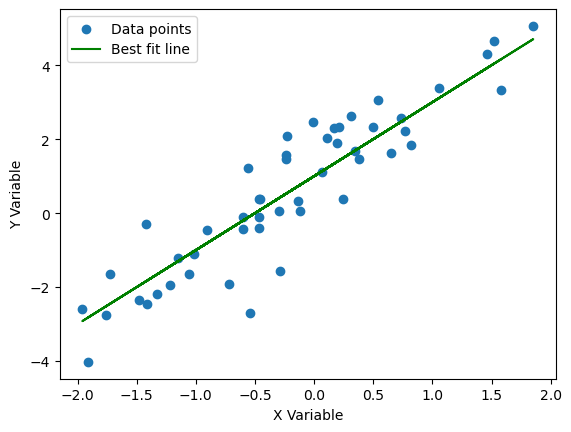

In [39]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.plot(dataset["x"],dataset["p"], color = 'green')

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself!

- Create a new dataset called $\quad$```subset_above2``` 
- Subset records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations





In [40]:
# Write your own code here

subset_above2 = dataset.query("y >= 2")

print(len(dataset))
print(len(subset_above2))

print(len(subset_above2)/len(dataset))

50
15
0.3


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [41]:
# Note: abs(...) is the absolute value function
# Write your own code 

ybar = dataset["y"].mean()

stdv_sample = dataset["y"].std()

subset_threshold = dataset.query(" (abs(y - @ybar) <= @stdv_sample)")
len(subset_threshold)

#global variables are anything that are stored in jupyter
#when we use .query(), it will shield itself and not see the global command; therefore we need to add the @ to make it know the global variable we stored 


33

# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1, e)$

<font size = "5">

**smf.ols(formula = 'y ~ x', data = dataset).fit(cov = "HCI)**

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [42]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model = smf.ols(formula = 'y ~  x', data = dataset)
results = model.fit()

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

**.params - get the attribute "parameters from the results**

Compute the estimated best fit line

In [43]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1] * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.041022
x            2.103076
dtype: float64


/var/folders/yg/6msd46tn17s02dpyy6lqlyzc0000gn/T/ipykernel_34676/1095559853.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset["p_estimated"] = b_list[0] + b_list[1] * dataset["x"]


<font size = "5">

Plot the best fit line

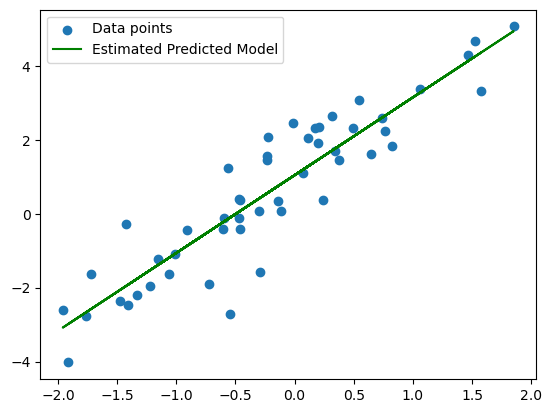

In [44]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.plot(dataset["x"],dataset["p_estimated"], color = 'green')

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()

<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping lineplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

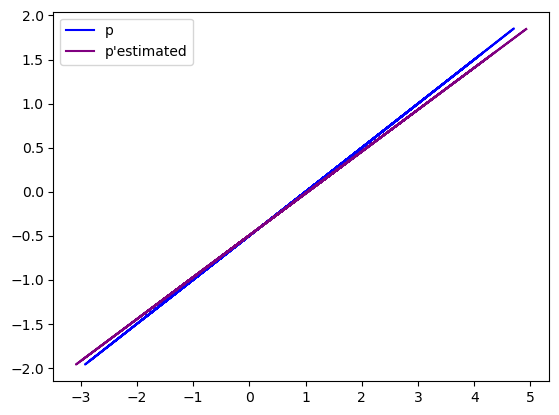

In [45]:
# Write your own code

plt.plot(dataset["p"], dataset["x"], color = "blue") 
plt.plot(dataset["p_estimated"], dataset["x"], color = "purple")
plt.legend(labels = ["p","p'estimated"])
plt.show()

<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error = lambda error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [48]:
# Write your own code

dataset['sample_error'] = dataset['y'] - dataset['p_estimated']

positive_error = lambda error: error >= 0

# allows you to apply a function (positive_error) to each element of a column (in this case, 'sample_error').
dataset['sample_error'] = dataset['sample_error'].apply(positive_error)

display(dataset)


,x,e,y,p,p_estimated,sample_error
0,0.496714,0.324084,2.317512,1.993428,2.085649,True
1,-0.138264,-0.385082,0.338389,0.723471,0.750241,False
2,0.647689,-0.676922,1.618455,2.295377,2.403160,False
3,1.523030,0.611676,4.657736,4.046060,4.244069,True
4,-0.234153,1.031000,1.562693,0.531693,0.548579,True
5,-0.234137,0.931280,1.463006,0.531726,0.548614,True
6,1.579213,-0.839218,3.319208,4.158426,4.362226,False
7,0.767435,-0.309212,2.225657,2.534869,2.654995,False
8,-0.469474,0.331263,0.392315,0.061051,0.053682,True
9,0.542560,0.975545,3.060665,2.085120,2.182067,True


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [49]:
# Write your own code

error_sqr = dataset['sample_error'] ** 2 
error_sqr.mean()

#or "np.mean(error_sqr)" also works


0.48